In [0]:
import math
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10

((train_data, train_label), (test_data, test_label)) = cifar10.load_data()

# 除以 255 讓顏色數值收斂到 0~1, 會讓後續訓練模型時, 可以提高準確率
train_x = train_data / 255
test_x = test_data / 255

# one hot encoding
train_label_onehot = tf.keras.utils.to_categorical(train_label, 10)
test_label_onehot = tf.keras.utils.to_categorical(test_label, 10)

Build Model - 單層CNN

In [0]:
model = keras.Sequential(
[
    layers.Conv2D(input_shape = (train_x.shape[1], train_x.shape[2], train_x.shape[3]),
                        filters = 20,             # kernel map 個數
                        kernel_size = (3,3),     # kernel map 大小
                        strides = (1,1),         # kernel map 每次移動步數
                        padding = 'same',        # 'vaild': 圖根據 filter和stride而變小，
                                                 # 'same': 用 zero-padding，讓圖大小不改變
                        activation = 'relu'),
    layers.Conv2D(filters = 20, kernel_size = (3,3), strides = (1,1), padding = 'same', activation = 'relu'),
    layers.MaxPool2D(pool_size = (2,2)),
    layers.Flatten(),
    layers.Dense(32, activation='relu'),
    layers.Dense(10, activation='softmax')
]
)

model.compile(optimizer=keras.optimizers.Adam(),
              # loss=keras.losses.CategoricalCrossentropy(),  # 需要使用to_categorical
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
model.summary()


Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 32, 32, 20)        560       
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 32, 32, 20)        3620      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 16, 16, 20)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 5120)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 32)                163872    
_________________________________________________________________
dense_15 (Dense)             (None, 10)                330       
Total params: 168,382
Trainable params: 168,382
Non-trainable params: 0
________________________________________________

In [0]:
history = model.fit(train_x, train_label, batch_size = 100, epochs = 10, validation_split = 0.1)

Train on 45000 samples, validate on 5000 samples
Epoch 1/10
45000/45000 [==============================] - 96s 2ms/sample - loss: 1.6279 - acc: 0.4161 - val_loss: 1.4005 - val_acc: 0.5074
Epoch 2/10
45000/45000 [==============================] - 95s 2ms/sample - loss: 1.2841 - acc: 0.5479 - val_loss: 1.2171 - val_acc: 0.5806
Epoch 3/10
45000/45000 [==============================] - 95s 2ms/sample - loss: 1.1624 - acc: 0.5928 - val_loss: 1.1474 - val_acc: 0.6046
Epoch 4/10
45000/45000 [==============================] - 95s 2ms/sample - loss: 1.0615 - acc: 0.6307 - val_loss: 1.0851 - val_acc: 0.6250
Epoch 5/10
45000/45000 [==============================] - 94s 2ms/sample - loss: 0.9825 - acc: 0.6599 - val_loss: 1.0593 - val_acc: 0.6406
Epoch 6/10
45000/45000 [==============================] - 95s 2ms/sample - loss: 0.9301 - acc: 0.6792 - val_loss: 1.0165 - val_acc: 0.6542
Epoch 7/10
45000/45000 [==============================] - 95s 2ms/sample - loss: 0.8829 - acc: 0.6924 - val_loss: 1.0

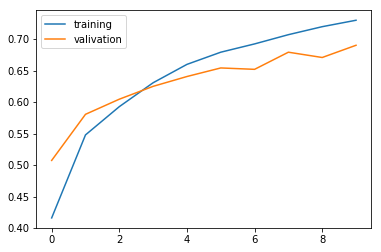

In [0]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['training', 'valivation'], loc='upper left')
plt.show()

In [0]:
res = model.evaluate(test_x, test_label)

print(res)

10000/10000 [==============================] - 7s 657us/sample - loss: 0.9831 - acc: 0.6674
[0.9830894521713257, 0.6674]


In [0]:
label_desc = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

def show_picture_label_prediction(datas, labels, predictions, indexList):
    num = len(indexList)

    # 設定畫布的寬(參數 1)與高(參數 2)
    plt.gcf().set_size_inches(2 * 5, (2+0.4) * math.ceil(num / 5)) 

    loc = 0
    for i in indexList :
        loc += 1
        subp = plt.subplot(math.ceil(num / 5), 5, loc) 
        subp.imshow(datas[i], cmap='binary') # 畫布上顯示圖案, 其中cmap=binary為顯示黑白圖案

        # 設定標題內容，有預測結果資料, 才在標題顯示預測結果
        if(len(predictions) > 0) :
            title = 'ai = ' + label_desc[ predictions[i] ]
            title += (' (o)' if predictions[i]==labels[i] else ' (x)')
            title += '\nlabel = ' + label_desc[ labels[i] ]

        else :
            title = 'label = ' + label_desc[ labels[i] ]
            
        subp.set_title(title, fontsize = 12)

        # X, Y 軸不顯示刻度
        subp.set_xticks([])
        subp.set_yticks([])

    plt.show()

畫出前十張圖片與預測結果


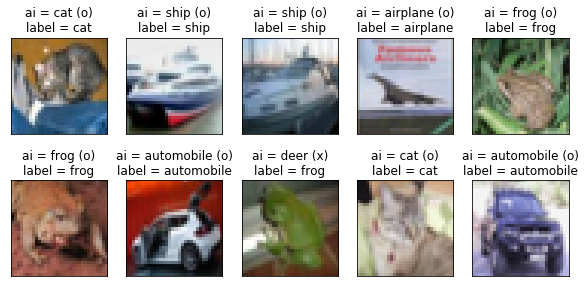

畫出前十張預測錯誤的圖片與結果


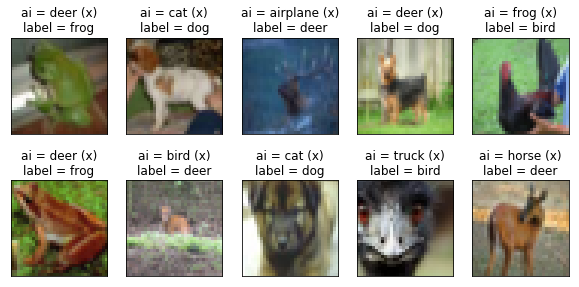

In [0]:
test_label_ = test_label.reshape(len(test_label))
test_pred = model.predict_classes(test_x)

print('畫出前十張圖片與預測結果')
show_picture_label_prediction(test_data, test_label_, test_pred, range(0, 10)) # 畫前十張圖片與預測結果



err_pred = np.argwhere(test_label_ != test_pred)
err_pred_10 = err_pred[:10].reshape(10)

print('畫出前十張預測錯誤的圖片與結果')
show_picture_label_prediction(test_data, test_label_, test_pred, err_pred_10) # 畫前十張預測錯誤的圖片與結果

Build Model - 2層CNN

Train on 45000 samples, validate on 5000 samples
Epoch 1/10
45000/45000 [==============================] - 144s 3ms/sample - loss: 1.7091 - acc: 0.3790 - val_loss: 1.5074 - val_acc: 0.4562
Epoch 2/10
45000/45000 [==============================] - 144s 3ms/sample - loss: 1.3740 - acc: 0.5058 - val_loss: 1.2738 - val_acc: 0.5512
Epoch 3/10
45000/45000 [==============================] - 144s 3ms/sample - loss: 1.2330 - acc: 0.5616 - val_loss: 1.1647 - val_acc: 0.5956
Epoch 4/10
45000/45000 [==============================] - 144s 3ms/sample - loss: 1.1302 - acc: 0.6011 - val_loss: 1.0813 - val_acc: 0.6274
Epoch 5/10
45000/45000 [==============================] - 143s 3ms/sample - loss: 1.0447 - acc: 0.6334 - val_loss: 1.0373 - val_acc: 0.6382
Epoch 6/10
45000/45000 [==============================] - 144s 3ms/sample - loss: 0.9787 - acc: 0.6572 - val_loss: 0.9718 - val_acc: 0.6700
Epoch 7/10
45000/45000 [==============================] - 143s 3ms/sample - loss: 0.9325 - acc: 0.6735 - val_lo

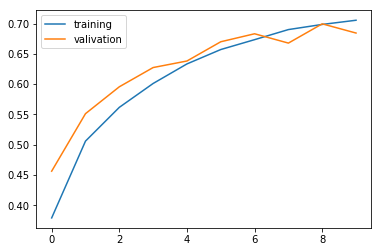

In [0]:
model_2CNN = keras.Sequential(
[
    layers.Conv2D(input_shape = (train_x.shape[1], train_x.shape[2], train_x.shape[3]),
                  filters = 32, kernel_size = (3,3), strides = (1,1), padding = 'same', activation = 'relu'),
    layers.Conv2D(filters = 32, kernel_size = (3,3), strides = (1,1), padding = 'same', activation = 'relu'),
    layers.MaxPool2D(pool_size = (2,2)),
    layers.Conv2D(filters = 16, kernel_size = (3,3), strides = (1,1), padding = 'valid',activation = 'relu'),
    layers.Conv2D(filters = 16, kernel_size = (3,3), strides = (1,1), padding = 'valid',activation = 'relu'),
    layers.MaxPool2D(pool_size = (2,2)),
    layers.Flatten(),
    layers.Dense(32, activation = 'relu'),
    layers.Dense(10, activation = 'softmax')
])

model_2CNN.compile(optimizer = keras.optimizers.Adam(),
              loss = keras.losses.CategoricalCrossentropy(),
              # loss = keras.losses.SparseCategoricalCrossentropy(),
              metrics = ['accuracy'])
# model_2CNN.summary()

history_2CNN = model_2CNN.fit(train_x, train_label_onehot, batch_size = 100, epochs = 10, validation_split = 0.1)

plt.plot(history_2CNN.history['acc'])
plt.plot(history_2CNN.history['val_acc'])
plt.legend(['training', 'valivation'], loc='upper left')
plt.show()

In [0]:
res = model_2CNN.evaluate(test_x, test_label_onehot)

print(res)

10000/10000 [==============================] - 9s 916us/sample - loss: 0.9291 - acc: 0.6779
[0.9290970619201661, 0.6779]
